In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [17]:
reds = (1,3,5,7,9,12,14,16,18,21,23,25,27,30,32,34,36)
blacks = (2,4,6,8,10,11,13,15,17,19,20,22,24,26,28,29,31,33,35)
for i in range(0, 5):
    a = input()
    x = np.random.randint(0, 37)
    print(x)
    if x == 0:
        print("Zero")
    elif x in reds:
        print("Red")
    else:
        print("Black")


20
Black

4
Black

11
Black

15
Black

7
Red


2.1 Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

In [12]:
# Проверим теорему о сложении вероятностей - вероятность появления одного из двух несовместных событий
# равна сумме вероятностей этих событий.
# P(A+B) = P(A) + P(B)
# P(A) = m/n, где m - кол-во выпадений орла (1), n - общее кол-во испытаний
# P(B) = k/n, где k - кол-во выпадений решки (0), n - общее кол-во испытаний
# P(A+B) = P(A) + P(B) = m/n + k/n = (m+k)/n
throws = 1000
eagle, nutlet = 0, 0
for i in range(0, throws):
    x = np.random.uniform(1, 10)
    if x < 5:
        eagle += 1
    else:
        nutlet += 1
print("Орел -", eagle, "Решка -", nutlet)
# проверим:
eagle/throws + nutlet/throws == 1

Орел - 467 Решка - 533


True

2.2 Сгенерируйте десять выборок случайных чисел х0, …, х9

и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

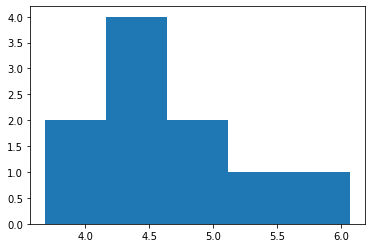

In [29]:
# сгенерируем n выборок m случайных чисел и запишем результат в массив:
n = 10
m = 10
num_bins = 5
total = np.array([np.random.rand(m) for _ in range(n)])
# построим гистограмму распределения случайной суммы:
n, bins, pathes = plt.hist(np.array([np.sum(x) for x in total]), num_bins)
plt.show()

3.1 Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.

In [30]:
def Bernoulli(n, k):
    C = np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n - k))
    p = 1 / 2
    q = 1 - p
    return C * np.power(p, k) * np.power(q, n - k)

In [31]:
def Monte_Carlo(k, n):
    a = np.random.randint(0, 2, n)
    b = np.random.randint(0, 2, n)
    c = np.random.randint(0, 2, n)
    d = np.random.randint(0, 2, n)
    x = a + b + c + d
    for i in range(0, n):
        if x[i] == 2:
            k = k + 1
    return k / n        
print(f'Monte Carlo: {np.round(Monte_Carlo(0, 10000), 4)},  Bernoulli: {np.round(Bernoulli(4, 2), 4)}')

Monte Carlo: 0.3771,  Bernoulli: 0.375


In [32]:
# с другими k and n
def Bernoulli(n, k):
    C = np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n - k))
    p = 1 / 2
    q = 1 - p
    return C * np.power(p, k) * np.power(q, n - k)

In [36]:
def Monte_Carlo(k, n):
    a = np.random.randint(0, 2, n)
    b = np.random.randint(0, 2, n)
    c = np.random.randint(0, 2, n)
    d = np.random.randint(0, 2, n)
    e = np.random.randint(0, 2, n)
    f = np.random.randint(0, 2, n)
    x = a + b + c + d + e + f
    for i in range(0, n):
        if x[i] == 4:
            k = k + 1
    return k / n        
print(f'Monte Carlo: {np.round(Monte_Carlo(0, 10000), 4)},  Bernoulli: {np.round(Bernoulli(6, 4), 4)}')

Monte Carlo: 0.2408,  Bernoulli: 0.2344


4. Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k.

In [37]:
import itertools 

In [38]:
# перестановки 
for p in itertools.permutations("1234",3):
    print(''.join(str(x) for x in p))

123
124
132
134
142
143
213
214
231
234
241
243
312
314
321
324
341
342
412
413
421
423
431
432


In [39]:
# сочетания
for p in itertools.combinations("1234",3):
    print(''.join(p))

123
124
134
234


In [40]:
for p in itertools.product("1234",repeat=3):
    print(''.join(p))

111
112
113
114
121
122
123
124
131
132
133
134
141
142
143
144
211
212
213
214
221
222
223
224
231
232
233
234
241
242
243
244
311
312
313
314
321
322
323
324
331
332
333
334
341
342
343
344
411
412
413
414
421
422
423
424
431
432
433
434
441
442
443
444


5. Дополните код расчетом коэффициента корреляции x и y по формуле
$$R = \frac{\sum(x_i-x_m)\cdot(y_i-y_m)}{\sqrt(\sum(x_i-x_m)^2(y_i-y_m)^2)}$$

In [41]:
# коэффициента корреляции
def R(x, y):
    a = np.sum((x - np.mean(x))*(y - np.mean(y)))
    b = np.sqrt(np.sum(np.power(x - np.mean(x), 2))*np.sum(np.power(y - np.mean(y), 2)))
    return a / b

0.8087973678915398 0.10047633794027683
0.8087973678915387 0.10047633794027766


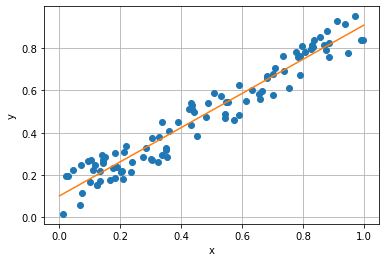

R: 0.9695


In [42]:
n = 100
r = 0.8
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y)) / (np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x)) / n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y, rcond=-1)[0]
print(a, b)
print(a1, b1)
plt.plot([0, 1], [b, a + b])
plt.show()
print(f'R: {np.round(R(x, y), 4)}')